<font size="6">Sales at "Et Femme" Online Store</font>
<br>
<font size="3">Et Femme opened up shop on Etsy in January 2021. The owner is interested in making a more robust marketing push with the holidays coming up and wants to know which customer segments to target. Client also wants to know general information about who is visitng the site, how much revenue is being generated monthly to track trends. They are also curious to see who is subscribed to their newsletter so they can better market and cater content to those customers. </font>
<br>
<br>
<font size="3">1. What is the store's total revenue? What revenue trends are the store seeing? What is Et Femme's average revenue per month? What are min and max dollars and time spent on the site?  What browser are  customers using? What payment method are customers using? </font>
<br>
<font size="3">2. Who are the client's main customer segments? </font>
<br>
<font size="3">3. Which customer segments are most likely to subscribe to the newsletter?</font>

In [1]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext sql

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import sqlite3

<font size="3">Convert excel sheet(s) to SQL tables</font>

In [4]:
# Directory containing your XLSX files
xlsx_directory = '/Users/leahbowers/Portfolio/Online_Sales_Data/'

# SQLite database file
db_file = 'online_sales.db'

# Create a SQLite database connection
conn = sqlite3.connect(db_file)

# Iterate through XLSX files in the directory
for excel_file in os.listdir(xlsx_directory):
    if excel_file.endswith('.xlsx'):
        file_path = os.path.join(xlsx_directory, excel_file)
        
        # Read the XLSX file into a DataFrame
        df = pd.read_excel(file_path)
        
        # Replace spaces and special characters in column names with underscores
        df.columns = [c.replace(' ', '_').replace('.', '_').replace('-', '_') for c in df.columns]
        
        # Determine the table name (use the file name without extension)
        table_name = os.path.splitext(excel_file)[0]
        
        # Write the DataFrame to the SQLite database as a new table
        df.to_sql(table_name, conn, if_exists='replace', index=False)

# Commit changes and close the database connection
conn.commit()
conn.close()

In [5]:
# Connect to Online Sales database
%sql sqlite:///online_sales.db

In [53]:
# Check that table was converted from xlsx and pulled into database
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        name 
    FROM sqlite_master 
    WHERE type='table';
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+--------------+
| name         |
|--------------|
| online_sales |
+--------------+


In [54]:
# Confirm data types are correct
conn = sqlite3.connect('online_sales.db')
query = """
    PRAGMA table_info(online_sales)
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+-------+----------------+-----------+-----------+--------------+------+
|   cid | name           | type      |   notnull | dflt_value   |   pk |
|-------+----------------+-----------+-----------+--------------+------|
|     0 | customer_id    | INTEGER   |         0 |              |    0 |
|     1 | age            | INTEGER   |         0 |              |    0 |
|     2 | gender         | TEXT      |         0 |              |    0 |
|     3 | revenue_total  | REAL      |         0 |              |    0 |
|     4 | n_purchases    | INTEGER   |         0 |              |    0 |
|     5 | purchase_date  | TIMESTAMP |         0 |              |    0 |
|     6 | purchase_value | REAL      |         0 |              |    0 |
|     7 | pay_method     | TEXT      |         0 |              |    0 |
|     8 | time_spent     | INTEGER   |         0 |              |    0 |
|     9 | browser        | TEXT      |         0 |              |    0 |
|    10 | newsletter     | TEXT      |         0 | 

<font size="6">Introduction</font>

In [57]:
#Get preview of online_sales table
pd.set_option('display.max_columns',None)
sales = pd.read_excel('/Users/leahbowers/Portfolio/Online_Sales_Data/online_sales.xlsx')
sales.head(5)

,customer_id,age,gender,revenue_total,n_purchases,purchase_date,purchase_value,pay_method,time_spent,browser,newsletter,voucher
0,504308,53,Male,47.57,2,2021-06-22,26.16,Card,885,Chrome,not subscribed,not used
1,504309,18,Female,38.01,3,2021-12-10,3.04,PayPal,656,Chrome,not subscribed,used
2,504310,52,Female,11.13,1,2021-03-14,11.13,Digital Wallets,761,Chrome,subscribed,not used
3,504311,29,Male,56.81,5,2021-10-25,45.44,Card,906,Chrome,subscribed,not used
4,504312,21,Female,59.75,1,2021-09-14,59.75,Card,605,Chrome,subscribed,not used


In [55]:
# Check for duplicates
duplicate_rows = sales[sales.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Check for NaN (missing values)
nan_values = sales.isna().sum()
print("\nNaN (Missing Values) Count:")
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

Duplicate Rows:
Empty DataFrame
Columns: [customer_id, age, gender, revenue_total, n_purchases, purchase_date, purchase_value, pay_method, time_spent, browser, newsletter, voucher]
Index: []

NaN (Missing Values) Count:
+-------+----------------+-----------+-----------+--------------+------+
|   cid | name           | type      |   notnull | dflt_value   |   pk |
|-------+----------------+-----------+-----------+--------------+------|
|     0 | customer_id    | INTEGER   |         0 |              |    0 |
|     1 | age            | INTEGER   |         0 |              |    0 |
|     2 | gender         | TEXT      |         0 |              |    0 |
|     3 | revenue_total  | REAL      |         0 |              |    0 |
|     4 | n_purchases    | INTEGER   |         0 |              |    0 |
|     5 | purchase_date  | TIMESTAMP |         0 |              |    0 |
|     6 | purchase_value | REAL      |         0 |              |    0 |
|     7 | pay_method     | TEXT      |         0 |

<font size="6">Question 1</font>

<font size="3">**What is the store's total revenue? What revenue trends are the store seeing? What is Et Femme's average revenue per month? What are min and max dollars and time spent on the site?  What browser are  customers using? What payment method are customers using?**</font>
<br>
<font size="3">To date, Et Femme has brought in **1.9M dollars in total revenue**. Montly revenue trends show **January, December, and October** as having the highest revenue generated from online sales. The least amount of revenue is generated in February.</font>

In [58]:
#Get total revenue across store
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT
        ROUND(SUM(revenue_total),2) AS total_revenue
    FROM
        online_sales;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+-----------------+
|   total_revenue |
|-----------------|
|     1.91616e+06 |
+-----------------+


In [59]:
#Get total revenue per month
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT
    CASE
        WHEN strftime('%m', purchase_date) = '01' THEN 'January'
        WHEN strftime('%m', purchase_date) = '02' THEN 'February'
        WHEN strftime('%m', purchase_date) = '03' THEN 'March'
        WHEN strftime('%m', purchase_date) = '04' THEN 'April'
        WHEN strftime('%m', purchase_date) = '05' THEN 'May'
        WHEN strftime('%m', purchase_date) = '06' THEN 'June'
        WHEN strftime('%m', purchase_date) = '07' THEN 'July'
        WHEN strftime('%m', purchase_date) = '08' THEN 'August'
        WHEN strftime('%m', purchase_date) = '09' THEN 'September'
        WHEN strftime('%m', purchase_date) = '10' THEN 'October'
        WHEN strftime('%m', purchase_date) = '11' THEN 'November'
        WHEN strftime('%m', purchase_date) = '12' THEN 'December'
    END AS month_name,
    ROUND(SUM(revenue_total), 2) AS total_revenue
FROM
    online_sales
GROUP BY month_name
ORDER BY total_revenue DESC;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+--------------+-----------------+
| month_name   |   total_revenue |
|--------------+-----------------|
| January      |          167988 |
| December     |          165328 |
| October      |          163148 |
| August       |          162621 |
| May          |          161958 |
| March        |          160703 |
| July         |          159261 |
| September    |          159148 |
| April        |          158201 |
| June         |          157512 |
| November     |          155372 |
| February     |          144919 |
+--------------+-----------------+


Text(0, 0.5, 'Total Revenue')

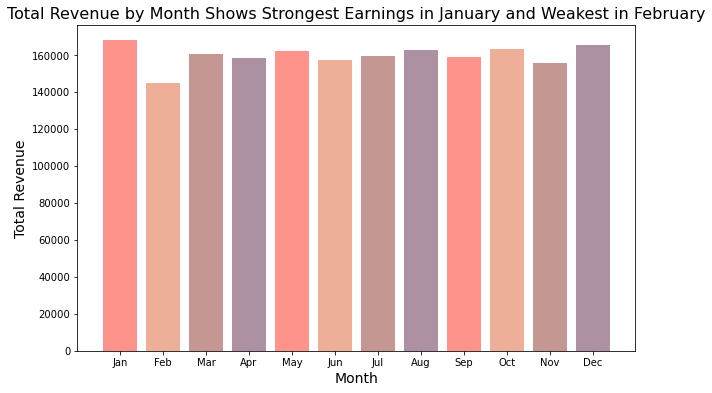

In [8]:
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        strftime('%m', purchase_date) AS month, ROUND(SUM(revenue_total),2) AS total_revenue 
    FROM online_sales 
    GROUP BY strftime('%m', purchase_date) 
    ORDER BY month;"""
result = pd.read_sql_query(query, conn)

month_names = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}
result['month'] = result['month'].map(month_names)

plt.figure(figsize=(10, 6))
plt.bar(result['month'], result['total_revenue'], color=['#fe938c', '#edaf97', '#c49792', '#ad91a3'])
plt.title('Total Revenue by Month Shows Strongest Earnings in January and Weakest in February', fontsize = 16)
plt.xlabel('Month',fontsize = 14)
plt.ylabel('Total Revenue',fontsize = 14)

<font size="3">Et Femme brings in an average of **\\$159,679  in revenue per month**. There is a **16% difference** between the highest revenue and lowest revenue months. </font>

In [62]:
#Get average revenue per month and % difference in month with maximum revenue compared to that with least revenue
conn = sqlite3.connect('online_sales.db')
query = """
    WITH monthly_revenue AS (
    SELECT
        strftime('%m', purchase_date) AS month,
        ROUND(SUM(revenue_total), 2) AS total_revenue
    FROM
        online_sales
    GROUP BY strftime('%m', purchase_date)
    ORDER BY total_revenue DESC
)

SELECT
    ROUND(AVG(total_revenue), 2) AS average_revenue,
    ROUND(((MAX(total_revenue) - MIN(total_revenue)) / MIN(total_revenue) * 100), 2) AS perc_diff_revenue
FROM
    monthly_revenue;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+-------------------+---------------------+
|   average_revenue |   perc_diff_revenue |
|-------------------+---------------------|
|            159680 |               15.92 |
+-------------------+---------------------+


<font size="3">The **most spent** by any one customer is **\\$63** and the **least** is **\\$0.53**. The **average** revenue spent is **\\$29**.</font>

In [63]:
#Get maximum, minimum, and average dollars spent in store
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT
        MIN(revenue_total) AS min_revenue,
        MAX(revenue_total) AS max_revenue,
        ROUND(AVG(revenue_total),2) AS avg_revenue
    FROM
        online_sales;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+---------------+---------------+---------------+
|   min_revenue |   max_revenue |   avg_revenue |
|---------------+---------------+---------------|
|          0.53 |          62.9 |         29.12 |
+---------------+---------------+---------------+


<font size="3">Customers spend between **2 to 18 minutes** on the website. They spend an **average of 10 minutes** the site.</font>

In [64]:
#Get maximum, minimum, and average time spent in store
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT
        MIN(time_spent)/60 AS min_time,
        MAX(time_spent)/60 AS max_time,
        ROUND(AVG(time_spent)/60,2) AS avg_time
    FROM
        online_sales;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+------------+------------+------------+
|   min_time |   max_time |   avg_time |
|------------+------------+------------|
|          2 |         18 |       9.98 |
+------------+------------+------------+


<font size="3">**Chrome is used by 60%** of customers. **Safari** is used only **20%**. Edge and Other browsers make up **15%** of usage.</font>

In [65]:
#Segment customers by browsers used
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        browser,
        COUNT(browser) AS ct_browser,
        ROUND((COUNT(browser) * 100.0 / (SELECT COUNT(*) FROM online_sales)),2) AS perc_browser
    FROM
        online_sales
    GROUP BY browser
    ORDER BY ct_browser DESC;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+-----------+--------------+----------------+
| browser   |   ct_browser |   perc_browser |
|-----------+--------------+----------------|
| Chrome    |        42076 |          63.95 |
| Safari    |        13135 |          19.96 |
| Other     |         7208 |          10.96 |
| Edge      |         3377 |           5.13 |
+-----------+--------------+----------------+


Text(0.5, 1.0, 'Chrome is the Preferred Browser for Et Femme Shoppers')

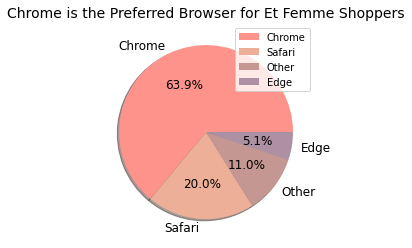

In [58]:
ax = sales['browser'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    ylabel=' ',
    shadow=True,
    legend=True,
    colors=['#fe938c', '#edaf97', '#c49792', '#ad91a3'],
    fontsize=12
)

ax.set_title('Chrome is the Preferred Browser for Et Femme Shoppers', fontsize=14)

<font size="3">Customers prefer to **pay by card (30%)** and **digital wallets (28%)**. **Paypal** is used by **22%** of customers and **18% use other payment methods**.</font>

In [66]:
#Segment customers by payment method used
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        pay_method,
        COUNT(pay_method) AS ct_pay_method,
        ROUND((COUNT(pay_method)*100/ (SELECT COUNT(*) FROM online_sales)),2) AS perc_pay_method
    FROM
        online_sales
    GROUP BY pay_method
    ORDER BY ct_pay_method DESC;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-----------------+-------------------+
| pay_method      |   ct_pay_method |   perc_pay_method |
|-----------------+-----------------+-------------------|
| Card            |           19754 |                30 |
| Digital Wallets |           19075 |                28 |
| PayPal          |           14551 |                22 |
| Other           |           12416 |                18 |
+-----------------+-----------------+-------------------+


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Card'),
  Text(1, 0, 'Digital Wallets'),
  Text(2, 0, 'PayPal'),
  Text(3, 0, 'Other')])

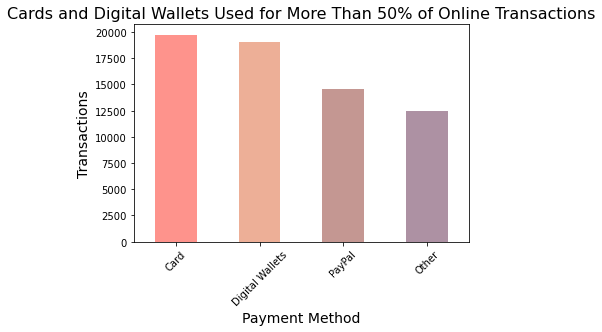

In [51]:
ax = sales['pay_method'].value_counts().plot(
    kind='bar', 
    color=['#fe938c', '#edaf97', '#c49792', '#ad91a3'])
ax.set_title("Cards and Digital Wallets Used for More Than 50% of Online Transactions", fontsize=16)
ax.set_xlabel('Payment Method', fontsize=14)
ax.set_ylabel('Transactions', fontsize=14)
plt.xticks(rotation=45)

<font size="6">Question 2</font>
<br>
<font size="3">**Who are the client's main customer segments?**</font>
<br>
<font size="3">People **ages 16 to 63** shop at Et Femme. **Women contribute 67%** of Et Femme's revenue. Specifically, **women aged 45-54, 35-44, and 24-34** are the client's top three customer segments. **Men between 55 - 64 contribute least** to the client's total revenue. </font>

In [67]:
#Get minimum and maximum ages of customers
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        MIN(age) AS min_age,
        MAX(age) AS max_age
    FROM online_sales;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+-----------+-----------+
|   min_age |   max_age |
|-----------+-----------|
|        16 |        63 |
+-----------+-----------+


In [68]:
#Determine total revenue generated by female and male customers and calculate the percentage of revenue for each
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        gender,
        ROUND(SUM(revenue_total),2) AS total_revenue,
        ROUND((SUM(revenue_total) * 100 / (SELECT SUM(revenue_total) FROM online_sales)), 2) AS perc_revenue
    FROM online_sales
    GROUP BY gender
    ORDER BY total_revenue DESC;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+----------+------------------+----------------+
| gender   |    total_revenue |   perc_revenue |
|----------+------------------+----------------|
| Female   |      1.28592e+06 |          67.11 |
| Male     | 630237           |          32.89 |
+----------+------------------+----------------+


Text(0.5, 1.0, 'Women Comprise 67% of Et Femme Customer Base')

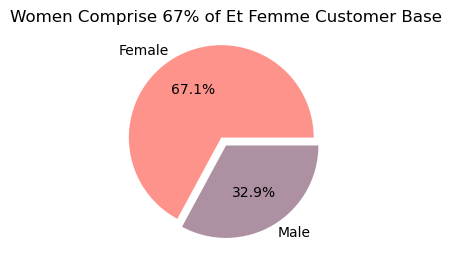

In [23]:
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        gender,
        ROUND(SUM(revenue_total),2) AS total_revenue,
        ROUND((SUM(revenue_total) * 100 / (SELECT SUM(revenue_total) FROM online_sales)), 2) AS perc_revenue
    FROM online_sales
    GROUP BY gender
    ORDER BY total_revenue DESC;
"""
result = pd.read_sql_query(query, conn)

plt.figure(figsize=(3, 3))
labels = result['gender']
sizes = result['total_revenue']
colors = ['#fe938c', '#ad91a3']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, textprops={'fontsize': 10})
plt.title('Women Comprise 67% of Et Femme Customer Base', fontsize=12)

In [69]:
#Segment customers by age and gender and determine how many customers are in each segment, 
#number of purchases, the total revenue and percentage of the total revenue each segment contributed
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full column content without truncation

conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        gender,
        (CASE 
             WHEN age BETWEEN 16 and 24 THEN '16 - 24'
             WHEN age BETWEEN 25 and 34 THEN '25 - 34'
             WHEN age BETWEEN 35 and 44 THEN '35 - 44'
             WHEN age BETWEEN 45 and 54 THEN '45 - 54'
             WHEN age BETWEEN 55 and 64 THEN '55 - 64'
             ELSE '65+' END) AS age_groups,
        COUNT (*) AS ct_customers,
        SUM(n_purchases) AS total_purchases,
        ROUND(SUM(revenue_total),2) AS total_revenue,
        ROUND((SUM(revenue_total) * 100 / (SELECT SUM(revenue_total) FROM online_sales)), 2) AS perc_revenue
    FROM online_sales
    GROUP BY gender, age_groups 
    ORDER BY total_revenue DESC;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+----------+--------------+----------------+-------------------+-----------------+----------------+
| gender   | age_groups   |   ct_customers |   total_purchases |   total_revenue |   perc_revenue |
|----------+--------------+----------------+-------------------+-----------------+----------------|
| Female   | 45 - 54      |           9387 |             37301 |          272152 |          14.2  |
| Female   | 35 - 44      |           9134 |             36567 |          267745 |          13.97 |
| Female   | 25 - 34      |           9206 |             37166 |          267576 |          13.96 |
| Female   | 55 - 64      |           8318 |             33091 |          242433 |          12.65 |
| Female   | 16 - 24      |           8127 |             32322 |          236015 |          12.32 |
| Male     | 45 - 54      |           4600 |             18080 |          135138 |           7.05 |
| Male     | 35 - 44      |           4550 |             18320 |          131421 |           6.86 |


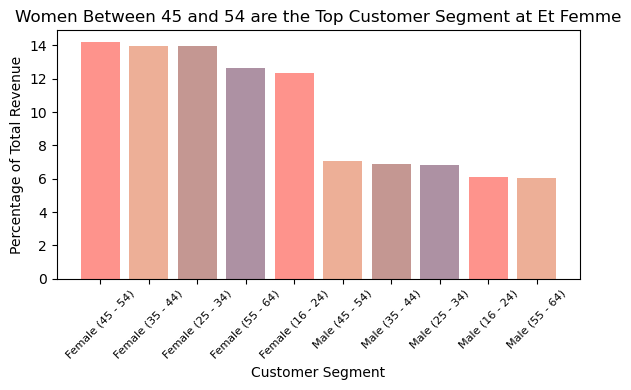

In [73]:
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT 
        gender,
        (CASE 
             WHEN age BETWEEN 16 and 24 THEN '16 - 24'
             WHEN age BETWEEN 25 and 34 THEN '25 - 34'
             WHEN age BETWEEN 35 and 44 THEN '35 - 44'
             WHEN age BETWEEN 45 and 54 THEN '45 - 54'
             WHEN age BETWEEN 55 and 64 THEN '55 - 64'
             ELSE '65+' END) AS age_groups,
        ROUND((SUM(revenue_total) * 100 / (SELECT SUM(revenue_total) FROM online_sales)), 2) AS perc_revenue
    FROM online_sales
    GROUP BY gender, age_groups
    ORDER BY perc_revenue DESC;
"""
result = pd.read_sql_query(query, conn)

plt.figure(figsize=(6, 4))
labels = result['gender'] + ' (' + result['age_groups'] + ')'
values = result['perc_revenue']
colors=['#fe938c', '#edaf97', '#c49792', '#ad91a3']

plt.bar(labels, values, color=colors)
plt.title('Women Between 45 and 54 are the Top Customer Segment at Et Femme', fontsize=12)
plt.xlabel('Customer Segment', fontsize=10)
plt.ylabel('Percentage of Total Revenue', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()

<font size="3">Check that total customers are the same as number of records.</font>

In [77]:
conn = sqlite3.connect('online_sales.db')
query = """
    WITH customer_segments AS (
    SELECT 
        gender,
        (CASE 
             WHEN age BETWEEN 16 and 24 THEN '16 - 24'
             WHEN age BETWEEN 25 and 34 THEN '25 - 34'
             WHEN age BETWEEN 35 and 44 THEN '35 - 44'
             WHEN age BETWEEN 45 and 54 THEN '45 - 54'
             WHEN age BETWEEN 55 and 64 THEN '55 - 64'
             ELSE '65+' END) AS age_groups,
        COUNT (*) AS number_customers,
        SUM(n_purchases) AS total_purchases,
        ROUND(SUM(revenue_total), 2) AS total_revenue
    FROM online_sales
    GROUP BY gender, age_groups 
    ORDER BY total_revenue DESC)

    SELECT
        SUM(number_customers) AS total_customers,
        (SELECT COUNT(*) FROM online_sales) AS record_count
    FROM 
        customer_segments;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+-------------------+----------------+
|   total_customers |   record_count |
|-------------------+----------------|
|             65796 |          65796 |
+-------------------+----------------+


<font size="6"> Question 3 </font>
<br>
<font size="3">**Which customer segments are most likely subscribed to the newsletter?**</font>
<br>
<font size="3">**Women aged 45-54 are most likely to subscribe** to the newsletter followed by women of ages 25-34, then 35-44 are . **Men 16-24 are least likely** to subscribe.</font>

In [78]:
#Segment customers who subscribe to the Et Femme newsletter by age and gender 
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT
        gender,
        (CASE 
             WHEN age BETWEEN 16 and 24 THEN '16 - 24'
             WHEN age BETWEEN 25 and 34 THEN '25 - 34'
             WHEN age BETWEEN 35 and 44 THEN '35 - 44'
             WHEN age BETWEEN 45 and 54 THEN '45 - 54'
             WHEN age BETWEEN 55 and 64 THEN '55 - 64'
             ELSE '65+' END) AS age_groups,
        COUNT(*) AS newsletter_subscribers
    FROM
        online_sales
    WHERE newsletter = 'subscribed'
    GROUP BY gender, age_groups
    ORDER BY newsletter_subscribers DESC;
"""
result = pd.read_sql_query(query, conn)
print(tabulate(result, headers='keys', tablefmt='psql', showindex=False))

+----------+--------------+--------------------------+
| gender   | age_groups   |   newsletter_subscribers |
|----------+--------------+--------------------------|
| Female   | 45 - 54      |                     1467 |
| Female   | 25 - 34      |                     1408 |
| Female   | 35 - 44      |                     1314 |
| Female   | 55 - 64      |                     1246 |
| Female   | 16 - 24      |                     1222 |
| Male     | 35 - 44      |                      707 |
| Male     | 45 - 54      |                      701 |
| Male     | 25 - 34      |                      666 |
| Male     | 55 - 64      |                      616 |
| Male     | 16 - 24      |                      590 |
+----------+--------------+--------------------------+


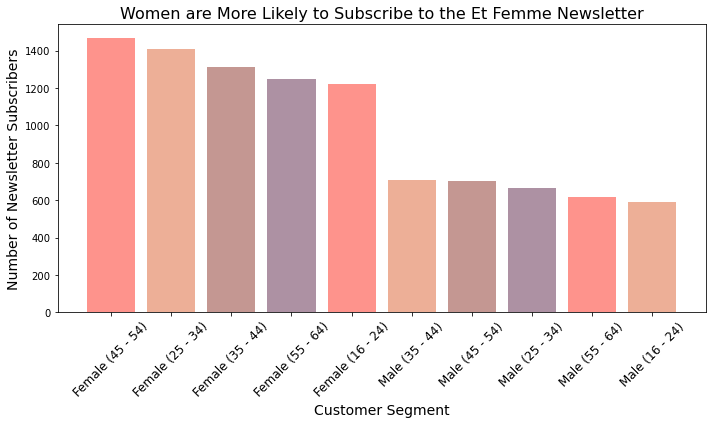

In [71]:
conn = sqlite3.connect('online_sales.db')
query = """
    SELECT
        gender,
        (CASE 
             WHEN age BETWEEN 16 and 24 THEN '16 - 24'
             WHEN age BETWEEN 25 and 34 THEN '25 - 34'
             WHEN age BETWEEN 35 and 44 THEN '35 - 44'
             WHEN age BETWEEN 45 and 54 THEN '45 - 54'
             WHEN age BETWEEN 55 and 64 THEN '55 - 64'
             ELSE '65+' END) AS age_groups,
        COUNT(*) AS newsletter_subscribers
    FROM online_sales
    WHERE newsletter = "subscribed"
    GROUP BY gender, age_groups
    ORDER BY newsletter_subscribers DESC;
"""
result = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
labels = result['gender'] + ' (' + result['age_groups'] + ')'
values = result['newsletter_subscribers']
colors=['#fe938c', '#edaf97', '#c49792', '#ad91a3']

plt.bar(labels, values, color=colors)
plt.title('Women are More Likely to Subscribe to the Et Femme Newsletter', fontsize=16)
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Number of Newsletter Subscribers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()

<font size="6">Conclusion and Recommendations</font>
<br>
<font size="3">Et Femme has brought in **\$1.9M  in total sales revenue** since opening in 2021. It experiences a **consistent** revenue stream of about **\$160,000  on average month over month** wtih slight pick-ups in **January, December, and October**. Et Femme should  *optimize stocking practices to account for this uptick during those months*. Et Femme caters largely to **women**, who make up **67%** of their customer base. Women aged aged **25-54** comprise its top three customer segments with **women aged 45-54 being its top segment**, both in **revenue and newsletter subscribers**. Et Femme's marketing department should *use most of its advertising budget catering to women aged 45-54*. The client's marketing department should *focus its newletter content toward this demographic* as well and leverage this customer base to *make strategic partnerships with companies who share similar demographic bases*.</font>

<font size="2">All data for this project was acquired through Kaggle's Database "Online Shop Customer Sales Data"</font>